In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.layers import SimpleRNN
import os

Using TensorFlow backend.


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000, 28,28).astype('float32') /  255
x_test = x_test.reshape(10000, 28,28).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
#input_shape=[batch_size, time_steps, features]
#return_sequences - return last sequence in output sequence or full sequence.
from keras.layers import Flatten
model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(units = 150, activation='tanh',  return_sequences=True,use_bias=True, kernel_initializer='glorot_uniform',
                                   bias_initializer='zeros',input_shape=( 28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(40, activation = 'tanh'),
        tf.keras.layers.Dense(10, activation='sigmoid')
        ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 28, 150)           26850     
_________________________________________________________________
flatten (Flatten)            (None, 4200)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                168040    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
Total params: 195,300
Trainable params: 195,300
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,),
        metrics = ["accuracy"])

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 150 , epochs=100, verbose=1, shuffle=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 226us/sample - loss: 2.2415 - accuracy: 0.2646 - val_loss: 2.1612 - val_accuracy: 0.4979
Epoch 2/100
60000/60000 [==============================] - 13s 215us/sample - loss: 2.1053 - accuracy: 0.5990 - val_loss: 2.0545 - val_accuracy: 0.6658
Epoch 3/100
60000/60000 [==============================] - 12s 203us/sample - loss: 2.0233 - accuracy: 0.6906 - val_loss: 1.9912 - val_accuracy: 0.7143
Epoch 4/100
60000/60000 [==============================] - 12s 200us/sample - loss: 1.9727 - accuracy: 0.7282 - val_loss: 1.9502 - val_accuracy: 0.7429
Epoch 5/100
60000/60000 [==============================] - 12s 207us/sample - loss: 1.9384 - accuracy: 0.7509 - val_loss: 1.9211 - val_accuracy: 0.7605
Epoch 6/100
60000/60000 [==============================] - 13s 222us/sample - loss: 1.9133 - accuracy: 0.7657 - val_loss: 1.8990 - val_accuracy: 0.7750
Epoch 7/100
60000/60000 [=============

In [8]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [2.241520832180977, 2.105324090719223, 2.023261062502861, 1.9727430495619773, 1.9384458243846894, 1.9132837748527527, 1.8938307082653045, 1.8781572061777114, 1.8650737899541854, 1.8538193696737288, 1.8439013981819152, 1.8349955922365189, 1.8268818521499635, 1.81940573066473, 1.8124551874399186, 1.8059466627240182, 1.799816099703312, 1.7940134206414222, 1.7884986734390258, 1.7832394415140151, 1.7782091099023818, 1.7733855119347572, 1.7687499827146531, 1.7642866492271423, 1.7599819254875184, 1.7558240041136741, 1.7518026247620582, 1.7479087367653847, 1.7441343349218368, 1.7404722717404366, 1.7369161367416381, 1.7334601470828057, 1.730099019408226, 1.7268279698491096, 1.723642595410347, 1.7205388084053994, 1.7175128906965256, 1.714561335146427, 1.7116809314489365, 1.7088686609268189, 1.7061216726899147, 1.7034373465180397, 1.7008132186532021, 1.6982469567656517, 1.6957363539934158, 1.6932793429493904, 1.6908739826083183, 1.6885184305906296, 1.6862109276652335, 1.6

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_learningCurve(history, epochs):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10,6))
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10,6))
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

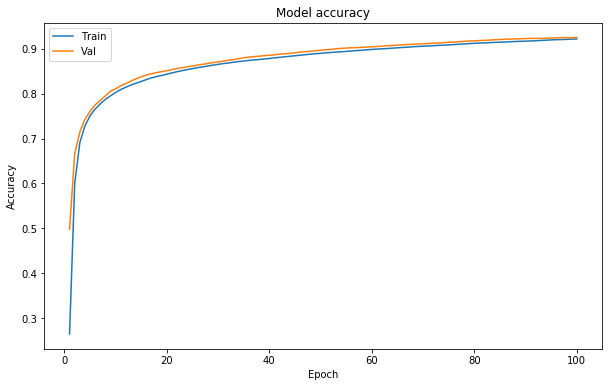

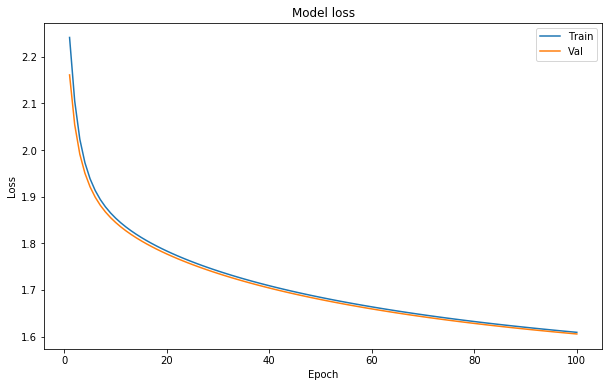

In [10]:
plot_learningCurve(history,100)

# Multiple outputs using StackedRNNCells

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000, 784).astype('float32') /  255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

y_train, y_test = np.array(y_train), np.array(y_test)
# #Reserve 10000 samples for Validation
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

In [12]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [13]:
#x_test.shape, y_test.shape

In [14]:
x_train = x_train.reshape(60000,784,1)
x_test = x_test.reshape(10000,784,1)
x_train.shape, x_test.shape

((60000, 784, 1), (10000, 784, 1))

In [21]:
#Multiple Outputs
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

#Feature Extraction
cells = [
    tf.keras.layers.LSTMCell(10),
    tf.keras.layers.LSTMCell(10),
    tf.keras.layers.LSTMCell(10),
]

#Classification Output
inputs = tf.keras.Input((28*28, 1))
x = tf.keras.layers.RNN(cells, return_sequences=True)(inputs)
print(x.get_shape())
x = tf.keras.layers.Dense(40, activation='relu')(x)
output_1 = tf.keras.layers.Dense(1, activation='sigmoid')(x)

#Sequence Output
output_2 =  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1,activation='linear'),input_shape=(28,28,1))(x)
                                            
#Ouput
model = tf.keras.Model(inputs=inputs, outputs=[output_2])#output_1

(None, 784, 10)


In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
rnn_2 (RNN)                  (None, 784, 10)           2160      
_________________________________________________________________
dense_8 (Dense)              (None, 784, 40)           440       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 784, 1)            41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,),
        metrics = ["accuracy"])

In [25]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size = 100 , epochs=3, verbose=1, shuffle=False)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 315s 7ms/sample - loss: 6.6189 - accuracy: 0.0985 - val_loss: 6.5876 - val_accuracy: 0.0995
Epoch 2/3
48000/48000 [==============================] - 308s 6ms/sample - loss: 6.5259 - accuracy: 0.0985 - val_loss: 6.4396 - val_accuracy: 0.0995
Epoch 3/3
48000/48000 [==============================] - 331s 7ms/sample - loss: 6.2390 - accuracy: 0.0985 - val_loss: 5.9075 - val_accuracy: 0.0995


# One-to-One LSTM for sequence prediction.

In [26]:
# LSTM help solve the exploding problem given weights
# Input gate - controls memory update
# Forget  gate - reset to zero
#Output gate - makes info visible
# Sigmoid - helps with the smooth curve and tanh helps with gradient distribution.

from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#Prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
x = seq.reshape(len(seq), 1,1)
y = seq.reshape(len(seq),1)

#Define LSTM configuration
n_neurons = length
n_batch = length
n_epochs = 1000

#create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

#Train LSTM
model.fit(x,y, epochs=n_epochs, batch_size=n_batch, verbose=2)

#Evaluate
result = model.predict(x, batch_size=n_batch, verbose=0)
for value in result:
    print('%.1f'% value)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Train on 5 samples
Epoch 1/1000
5/5 - 3s - loss: 0.2058
Epoch 2/1000
5/5 - 0s - loss: 0.2041
Epoch 3/1000
5/5 - 0s - loss: 0.2023
Epoch 4/1000
5/5 - 0s - loss: 0.2006
Epoch 5/1000
5/5 - 0s - loss: 0.1988
Epoch 6/1000
5/5 - 0s - loss: 0.1971
Epoch 7/1000
5/5 - 0s - loss: 0.1954
Epoch 8/1000
5/5 - 0s - loss: 0.1937
Epoch 9/1000
5/5 - 0s - loss: 0.1919
Epoch 10/1000
5/5 - 0s - loss: 0.1903
Epoch 11/1000
5/5 - 0s - loss: 0.1886
Epoch 12/1000
5/5 - 0s - loss: 0.1869
Epoch 13/1000
5/5 - 0s - loss: 0.1852
Epoch 14/

Epoch 198/1000
5/5 - 0s - loss: 0.0347
Epoch 199/1000
5/5 - 0s - loss: 0.0345
Epoch 200/1000
5/5 - 0s - loss: 0.0344
Epoch 201/1000
5/5 - 0s - loss: 0.0342
Epoch 202/1000
5/5 - 0s - loss: 0.0340
Epoch 203/1000
5/5 - 0s - loss: 0.0339
Epoch 204/1000
5/5 - 0s - loss: 0.0338
Epoch 205/1000
5/5 - 0s - loss: 0.0336
Epoch 206/1000
5/5 - 0s - loss: 0.0335
Epoch 207/1000
5/5 - 0s - loss: 0.0333
Epoch 208/1000
5/5 - 0s - loss: 0.0332
Epoch 209/1000
5/5 - 0s - loss: 0.0330
Epoch 210/1000
5/5 - 0s - loss: 0.0329
Epoch 211/1000
5/5 - 0s - loss: 0.0328
Epoch 212/1000
5/5 - 0s - loss: 0.0326
Epoch 213/1000
5/5 - 0s - loss: 0.0325
Epoch 214/1000
5/5 - 0s - loss: 0.0324
Epoch 215/1000
5/5 - 0s - loss: 0.0323
Epoch 216/1000
5/5 - 0s - loss: 0.0321
Epoch 217/1000
5/5 - 0s - loss: 0.0320
Epoch 218/1000
5/5 - 0s - loss: 0.0319
Epoch 219/1000
5/5 - 0s - loss: 0.0318
Epoch 220/1000
5/5 - 0s - loss: 0.0317
Epoch 221/1000
5/5 - 0s - loss: 0.0315
Epoch 222/1000
5/5 - 0s - loss: 0.0314
Epoch 223/1000
5/5 - 0s -

Epoch 409/1000
5/5 - 0s - loss: 0.0146
Epoch 410/1000
5/5 - 0s - loss: 0.0145
Epoch 411/1000
5/5 - 0s - loss: 0.0144
Epoch 412/1000
5/5 - 0s - loss: 0.0143
Epoch 413/1000
5/5 - 0s - loss: 0.0142
Epoch 414/1000
5/5 - 0s - loss: 0.0142
Epoch 415/1000
5/5 - 0s - loss: 0.0141
Epoch 416/1000
5/5 - 0s - loss: 0.0140
Epoch 417/1000
5/5 - 0s - loss: 0.0139
Epoch 418/1000
5/5 - 0s - loss: 0.0139
Epoch 419/1000
5/5 - 0s - loss: 0.0138
Epoch 420/1000
5/5 - 0s - loss: 0.0137
Epoch 421/1000
5/5 - 0s - loss: 0.0136
Epoch 422/1000
5/5 - 0s - loss: 0.0135
Epoch 423/1000
5/5 - 0s - loss: 0.0135
Epoch 424/1000
5/5 - 0s - loss: 0.0134
Epoch 425/1000
5/5 - 0s - loss: 0.0133
Epoch 426/1000
5/5 - 0s - loss: 0.0132
Epoch 427/1000
5/5 - 0s - loss: 0.0132
Epoch 428/1000
5/5 - 0s - loss: 0.0131
Epoch 429/1000
5/5 - 0s - loss: 0.0130
Epoch 430/1000
5/5 - 0s - loss: 0.0129
Epoch 431/1000
5/5 - 0s - loss: 0.0129
Epoch 432/1000
5/5 - 0s - loss: 0.0128
Epoch 433/1000
5/5 - 0s - loss: 0.0127
Epoch 434/1000
5/5 - 0s -

Epoch 620/1000
5/5 - 0s - loss: 0.0029
Epoch 621/1000
5/5 - 0s - loss: 0.0029
Epoch 622/1000
5/5 - 0s - loss: 0.0029
Epoch 623/1000
5/5 - 0s - loss: 0.0028
Epoch 624/1000
5/5 - 0s - loss: 0.0028
Epoch 625/1000
5/5 - 0s - loss: 0.0028
Epoch 626/1000
5/5 - 0s - loss: 0.0028
Epoch 627/1000
5/5 - 0s - loss: 0.0027
Epoch 628/1000
5/5 - 0s - loss: 0.0027
Epoch 629/1000
5/5 - 0s - loss: 0.0027
Epoch 630/1000
5/5 - 0s - loss: 0.0026
Epoch 631/1000
5/5 - 0s - loss: 0.0026
Epoch 632/1000
5/5 - 0s - loss: 0.0026
Epoch 633/1000
5/5 - 0s - loss: 0.0026
Epoch 634/1000
5/5 - 0s - loss: 0.0025
Epoch 635/1000
5/5 - 0s - loss: 0.0025
Epoch 636/1000
5/5 - 0s - loss: 0.0025
Epoch 637/1000
5/5 - 0s - loss: 0.0025
Epoch 638/1000
5/5 - 0s - loss: 0.0024
Epoch 639/1000
5/5 - 0s - loss: 0.0024
Epoch 640/1000
5/5 - 0s - loss: 0.0024
Epoch 641/1000
5/5 - 0s - loss: 0.0024
Epoch 642/1000
5/5 - 0s - loss: 0.0023
Epoch 643/1000
5/5 - 0s - loss: 0.0023
Epoch 644/1000
5/5 - 0s - loss: 0.0023
Epoch 645/1000
5/5 - 0s -

Epoch 820/1000
5/5 - 0s - loss: 3.2879e-04
Epoch 821/1000
5/5 - 0s - loss: 3.2559e-04
Epoch 822/1000
5/5 - 0s - loss: 3.2243e-04
Epoch 823/1000
5/5 - 0s - loss: 3.1931e-04
Epoch 824/1000
5/5 - 0s - loss: 3.1624e-04
Epoch 825/1000
5/5 - 0s - loss: 3.1320e-04
Epoch 826/1000
5/5 - 0s - loss: 3.1022e-04
Epoch 827/1000
5/5 - 0s - loss: 3.0727e-04
Epoch 828/1000
5/5 - 0s - loss: 3.0436e-04
Epoch 829/1000
5/5 - 0s - loss: 3.0150e-04
Epoch 830/1000
5/5 - 0s - loss: 2.9868e-04
Epoch 831/1000
5/5 - 0s - loss: 2.9589e-04
Epoch 832/1000
5/5 - 0s - loss: 2.9315e-04
Epoch 833/1000
5/5 - 0s - loss: 2.9044e-04
Epoch 834/1000
5/5 - 0s - loss: 2.8778e-04
Epoch 835/1000
5/5 - 0s - loss: 2.8515e-04
Epoch 836/1000
5/5 - 0s - loss: 2.8256e-04
Epoch 837/1000
5/5 - 0s - loss: 2.8000e-04
Epoch 838/1000
5/5 - 0s - loss: 2.7748e-04
Epoch 839/1000
5/5 - 0s - loss: 2.7500e-04
Epoch 840/1000
5/5 - 0s - loss: 2.7256e-04
Epoch 841/1000
5/5 - 0s - loss: 2.7015e-04
Epoch 842/1000
5/5 - 0s - loss: 2.6777e-04
Epoch 843/1

In [27]:
result = model.predict(x, batch_size=n_batch, verbose=0)
for value in result:
    print('%.1f'% value)

0.0
0.2
0.4
0.6
0.8


# Many-to-One LSTM fro sequence prediction(without TimeDistributed)

In [28]:
#prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length)

#LSTM configuration
n_neurons = length
n_batch = 1
n_epoch = 500

# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(length, 1)))
model.add(Dense(length))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)

# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:]:
	print('%.1f' % value)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None
Train on 1 samples
Epoch 1/500
1/1 - 3s - loss: 0.3037
Epoch 2/500
1/1 - 0s - loss: 0.3007
Epoch 3/500
1/1 - 0s - loss: 0.2978
Epoch 4/500
1/1 - 0s - loss: 0.2949
Epoch 5/500
1/1 - 0s - loss: 0.2920
Epoch 6/500
1/1 - 0s - loss: 0.2891
Epoch 7/500
1/1 - 0s - loss: 0.2863
Epoch 8/500
1/1 - 0s - loss: 0.2836
Epoch 9/500
1/1 - 0s - loss: 0.2808
Epoch 10/500
1/1 - 0s - loss: 0.2781
Epoch 11/500
1/1 - 0s - loss: 0.2755
Epoch 12/500
1/1 - 0s - loss: 0.2729
Epoch 13/500
1/1 - 0s - loss: 0.2703
Epoch 14/500
1/1 - 0s 

Epoch 203/500
1/1 - 0s - loss: 0.0231
Epoch 204/500
1/1 - 0s - loss: 0.0224
Epoch 205/500
1/1 - 0s - loss: 0.0216
Epoch 206/500
1/1 - 0s - loss: 0.0209
Epoch 207/500
1/1 - 0s - loss: 0.0202
Epoch 208/500
1/1 - 0s - loss: 0.0195
Epoch 209/500
1/1 - 0s - loss: 0.0189
Epoch 210/500
1/1 - 0s - loss: 0.0182
Epoch 211/500
1/1 - 0s - loss: 0.0176
Epoch 212/500
1/1 - 0s - loss: 0.0169
Epoch 213/500
1/1 - 0s - loss: 0.0163
Epoch 214/500
1/1 - 0s - loss: 0.0157
Epoch 215/500
1/1 - 0s - loss: 0.0151
Epoch 216/500
1/1 - 0s - loss: 0.0145
Epoch 217/500
1/1 - 0s - loss: 0.0140
Epoch 218/500
1/1 - 0s - loss: 0.0134
Epoch 219/500
1/1 - 0s - loss: 0.0129
Epoch 220/500
1/1 - 0s - loss: 0.0123
Epoch 221/500
1/1 - 0s - loss: 0.0118
Epoch 222/500
1/1 - 0s - loss: 0.0113
Epoch 223/500
1/1 - 0s - loss: 0.0109
Epoch 224/500
1/1 - 0s - loss: 0.0104
Epoch 225/500
1/1 - 0s - loss: 0.0099
Epoch 226/500
1/1 - 0s - loss: 0.0095
Epoch 227/500
1/1 - 0s - loss: 0.0091
Epoch 228/500
1/1 - 0s - loss: 0.0086
Epoch 229/50

Epoch 404/500
1/1 - 0s - loss: 3.8796e-10
Epoch 405/500
1/1 - 0s - loss: 3.5462e-10
Epoch 406/500
1/1 - 0s - loss: 3.2295e-10
Epoch 407/500
1/1 - 0s - loss: 2.9290e-10
Epoch 408/500
1/1 - 0s - loss: 2.6716e-10
Epoch 409/500
1/1 - 0s - loss: 2.4259e-10
Epoch 410/500
1/1 - 0s - loss: 2.2032e-10
Epoch 411/500
1/1 - 0s - loss: 2.0019e-10
Epoch 412/500
1/1 - 0s - loss: 1.8196e-10
Epoch 413/500
1/1 - 0s - loss: 1.6495e-10
Epoch 414/500
1/1 - 0s - loss: 1.4909e-10
Epoch 415/500
1/1 - 0s - loss: 1.3487e-10
Epoch 416/500
1/1 - 0s - loss: 1.2139e-10
Epoch 417/500
1/1 - 0s - loss: 1.1040e-10
Epoch 418/500
1/1 - 0s - loss: 9.9271e-11
Epoch 419/500
1/1 - 0s - loss: 8.8714e-11
Epoch 420/500
1/1 - 0s - loss: 8.0599e-11
Epoch 421/500
1/1 - 0s - loss: 7.2342e-11
Epoch 422/500
1/1 - 0s - loss: 6.5286e-11
Epoch 423/500
1/1 - 0s - loss: 5.7744e-11
Epoch 424/500
1/1 - 0s - loss: 5.2427e-11
Epoch 425/500
1/1 - 0s - loss: 4.6717e-11
Epoch 426/500
1/1 - 0s - loss: 4.1946e-11
Epoch 427/500
1/1 - 0s - loss: 3.7

# Many-to-Many LSTM for Sequence Prediction (with TimeDistributed)

In [29]:
#prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length, 1)

#LSTM configuration
n_neurons = length
n_batch = 1
n_epoch = 1000
#create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(length, 1), return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)

# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:,0]:
    print('%.1f' % value)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Train on 1 samples
Epoch 1/1000
1/1 - 3s - loss: 0.2285
Epoch 2/1000
1/1 - 0s - loss: 0.2258
Epoch 3/1000
1/1 - 0s - loss: 0.2231
Epoch 4/1000
1/1 - 0s - loss: 0.2204
Epoch 5/1000
1/1 - 0s - loss: 0.2177
Epoch 6/1000
1/1 - 0s - loss: 0.2151
Epoch 7/1000
1/1 - 0s - loss: 0.2125
Epoch 8/1000
1/1 - 0s - loss: 0.2099
Epoch 9/1000
1/1 - 0s - loss: 0.2073
Epoch 10/1000
1/1 - 0s - loss: 0.2048
Epoch 11/1000
1/1 - 0s - loss: 0.2022
Epoch 12/1000
1/1 - 0s - loss: 0.1997
Epoch 13/1000
1/1 - 0s - loss: 0.1972
Epoch 14/

Epoch 198/1000
1/1 - 0s - loss: 0.0066
Epoch 199/1000
1/1 - 0s - loss: 0.0066
Epoch 200/1000
1/1 - 0s - loss: 0.0066
Epoch 201/1000
1/1 - 0s - loss: 0.0065
Epoch 202/1000
1/1 - 0s - loss: 0.0065
Epoch 203/1000
1/1 - 0s - loss: 0.0065
Epoch 204/1000
1/1 - 0s - loss: 0.0064
Epoch 205/1000
1/1 - 0s - loss: 0.0064
Epoch 206/1000
1/1 - 0s - loss: 0.0064
Epoch 207/1000
1/1 - 0s - loss: 0.0063
Epoch 208/1000
1/1 - 0s - loss: 0.0063
Epoch 209/1000
1/1 - 0s - loss: 0.0063
Epoch 210/1000
1/1 - 0s - loss: 0.0062
Epoch 211/1000
1/1 - 0s - loss: 0.0062
Epoch 212/1000
1/1 - 0s - loss: 0.0062
Epoch 213/1000
1/1 - 0s - loss: 0.0062
Epoch 214/1000
1/1 - 0s - loss: 0.0061
Epoch 215/1000
1/1 - 0s - loss: 0.0061
Epoch 216/1000
1/1 - 0s - loss: 0.0061
Epoch 217/1000
1/1 - 0s - loss: 0.0060
Epoch 218/1000
1/1 - 0s - loss: 0.0060
Epoch 219/1000
1/1 - 0s - loss: 0.0060
Epoch 220/1000
1/1 - 0s - loss: 0.0059
Epoch 221/1000
1/1 - 0s - loss: 0.0059
Epoch 222/1000
1/1 - 0s - loss: 0.0059
Epoch 223/1000
1/1 - 0s -

Epoch 409/1000
1/1 - 0s - loss: 0.0027
Epoch 410/1000
1/1 - 0s - loss: 0.0027
Epoch 411/1000
1/1 - 0s - loss: 0.0026
Epoch 412/1000
1/1 - 0s - loss: 0.0026
Epoch 413/1000
1/1 - 0s - loss: 0.0026
Epoch 414/1000
1/1 - 0s - loss: 0.0026
Epoch 415/1000
1/1 - 0s - loss: 0.0026
Epoch 416/1000
1/1 - 0s - loss: 0.0026
Epoch 417/1000
1/1 - 0s - loss: 0.0026
Epoch 418/1000
1/1 - 0s - loss: 0.0026
Epoch 419/1000
1/1 - 0s - loss: 0.0026
Epoch 420/1000
1/1 - 0s - loss: 0.0026
Epoch 421/1000
1/1 - 0s - loss: 0.0026
Epoch 422/1000
1/1 - 0s - loss: 0.0026
Epoch 423/1000
1/1 - 0s - loss: 0.0026
Epoch 424/1000
1/1 - 0s - loss: 0.0026
Epoch 425/1000
1/1 - 0s - loss: 0.0025
Epoch 426/1000
1/1 - 0s - loss: 0.0025
Epoch 427/1000
1/1 - 0s - loss: 0.0025
Epoch 428/1000
1/1 - 0s - loss: 0.0025
Epoch 429/1000
1/1 - 0s - loss: 0.0025
Epoch 430/1000
1/1 - 0s - loss: 0.0025
Epoch 431/1000
1/1 - 0s - loss: 0.0025
Epoch 432/1000
1/1 - 0s - loss: 0.0025
Epoch 433/1000
1/1 - 0s - loss: 0.0025
Epoch 434/1000
1/1 - 0s -

1/1 - 0s - loss: 0.0018
Epoch 620/1000
1/1 - 0s - loss: 0.0018
Epoch 621/1000
1/1 - 0s - loss: 0.0018
Epoch 622/1000
1/1 - 0s - loss: 0.0018
Epoch 623/1000
1/1 - 0s - loss: 0.0018
Epoch 624/1000
1/1 - 0s - loss: 0.0018
Epoch 625/1000
1/1 - 0s - loss: 0.0018
Epoch 626/1000
1/1 - 0s - loss: 0.0018
Epoch 627/1000
1/1 - 0s - loss: 0.0018
Epoch 628/1000
1/1 - 0s - loss: 0.0018
Epoch 629/1000
1/1 - 0s - loss: 0.0018
Epoch 630/1000
1/1 - 0s - loss: 0.0018
Epoch 631/1000
1/1 - 0s - loss: 0.0018
Epoch 632/1000
1/1 - 0s - loss: 0.0018
Epoch 633/1000
1/1 - 0s - loss: 0.0018
Epoch 634/1000
1/1 - 0s - loss: 0.0018
Epoch 635/1000
1/1 - 0s - loss: 0.0018
Epoch 636/1000
1/1 - 0s - loss: 0.0018
Epoch 637/1000
1/1 - 0s - loss: 0.0018
Epoch 638/1000
1/1 - 0s - loss: 0.0017
Epoch 639/1000
1/1 - 0s - loss: 0.0017
Epoch 640/1000
1/1 - 0s - loss: 0.0017
Epoch 641/1000
1/1 - 0s - loss: 0.0017
Epoch 642/1000
1/1 - 0s - loss: 0.0017
Epoch 643/1000
1/1 - 0s - loss: 0.0017
Epoch 644/1000
1/1 - 0s - loss: 0.0017
E

Epoch 830/1000
1/1 - 0s - loss: 0.0013
Epoch 831/1000
1/1 - 0s - loss: 0.0013
Epoch 832/1000
1/1 - 0s - loss: 0.0013
Epoch 833/1000
1/1 - 0s - loss: 0.0013
Epoch 834/1000
1/1 - 0s - loss: 0.0013
Epoch 835/1000
1/1 - 0s - loss: 0.0013
Epoch 836/1000
1/1 - 0s - loss: 0.0013
Epoch 837/1000
1/1 - 0s - loss: 0.0013
Epoch 838/1000
1/1 - 0s - loss: 0.0013
Epoch 839/1000
1/1 - 0s - loss: 0.0013
Epoch 840/1000
1/1 - 0s - loss: 0.0013
Epoch 841/1000
1/1 - 0s - loss: 0.0013
Epoch 842/1000
1/1 - 0s - loss: 0.0013
Epoch 843/1000
1/1 - 0s - loss: 0.0013
Epoch 844/1000
1/1 - 0s - loss: 0.0013
Epoch 845/1000
1/1 - 0s - loss: 0.0012
Epoch 846/1000
1/1 - 0s - loss: 0.0012
Epoch 847/1000
1/1 - 0s - loss: 0.0012
Epoch 848/1000
1/1 - 0s - loss: 0.0012
Epoch 849/1000
1/1 - 0s - loss: 0.0012
Epoch 850/1000
1/1 - 0s - loss: 0.0012
Epoch 851/1000
1/1 - 0s - loss: 0.0012
Epoch 852/1000
1/1 - 0s - loss: 0.0012
Epoch 853/1000
1/1 - 0s - loss: 0.0012
Epoch 854/1000
1/1 - 0s - loss: 0.0012
Epoch 855/1000
1/1 - 0s -

# Funtional APIs 
#### Multilayer Perceptron
- This is  multilayer perceptron model for binary classification

In [30]:
inputs = tf.keras.Input(shape=(28*28,1))
hidden1 = tf.keras.layers.Dense(10, activation='relu')(inputs)
hidden2 = tf.keras.layers.Dense(20, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(10, activation='relu')(hidden2)
output = tf.keras.layers.Dense(1, activation='relu')(hidden3)
model = tf.keras.Model(inputs=inputs, outputs=output)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
dense_14 (Dense)             (None, 784, 10)           20        
_________________________________________________________________
dense_15 (Dense)             (None, 784, 20)           220       
_________________________________________________________________
dense_16 (Dense)             (None, 784, 10)           210       
_________________________________________________________________
dense_17 (Dense)             (None, 784, 1)            11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,),
        metrics = ["accuracy"])

In [32]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size = 100 , epochs=2, verbose=1, shuffle=False)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 20s 413us/sample - loss: 6.6645 - accuracy: 0.0985 - val_loss: 6.6644 - val_accuracy: 0.0995
Epoch 2/2
48000/48000 [==============================] - 18s 383us/sample - loss: 6.6644 - accuracy: 0.0985 - val_loss: 6.6644 - val_accuracy: 0.0995


In [33]:
# Convolutional Neural Network for image classification.
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
inputs = tf.keras.Input(shape=(64,64,1))
conv1 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPooling2D((2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D((2,2))(conv2)

flat = Flatten()(pool2)
hidden1 = tf.keras.layers.Dense(10, activation='relu')(flat)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden1)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2705

In [34]:
# Recurrent Neural Network before using this model scale datasset to range btn 0 - 1
inputs = tf.keras.Input(shape=(28*28,1))
hidden1 = tf.keras.layers.LSTM(10)(inputs)
hidden2 = tf.keras.layers.Dense(10, activation='relu')(hidden1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)
model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


# Shared Input Layer
- This model uses different sized kernels to interpret an image input, there is a shared input btn submodels which ouputs are flatten into vectors and concatented into one long vector then passed to the fully connected layer for interpretation
- Final output layer makes a binary classification.

In [35]:
#Input Layer
inputs = tf.keras.Input(shape=(64,46,1))

#First feature extractor
conv1 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPooling2D((2,2))(conv1)
flat1 = tf.keras.layers.Flatten()(pool1)

#Second feature ectractor
conv2 = tf.keras.layers.Conv2D(16, kernel_size=8, activation='relu')(inputs)
pool2 = tf.keras.layers.MaxPooling2D((2,2))(conv2)
flat2 = tf.keras.layers.Flatten()(pool2)

#Merge feature extractor
merge = tf.keras.layers.concatenate([flat1, flat2])

#interpretation layer
hidden1 = tf.keras.layers.Dense(10, activation='relu')(merge)
#Prediction output
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden1)
model = tf.keras.Model(inputs= inputs, outputs=output)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 64, 46, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 61, 43, 32)   544         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 57, 39, 16)   1040        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 30, 21, 32)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

# Shared Feature Extraction Layer

In [36]:
#Define input
inputs = tf.keras.Input(shape=(100,1))

#Feature Extraction
extract1 = tf.keras.layers.LSTM(10)(inputs)

#First interpretation model
interp1 = tf.keras.layers.Dense(10, activation='relu')(extract1)

#Second interpretation
interpl1 = tf.keras.layers.Dense(10, activation='relu')(extract1)
interpl2 = tf.keras.layers.Dense(20, activation='relu')(interpl1)
interpl3 = tf.keras.layers.Dense(10, activation='relu')(interpl2)

#Merge interpretation
merge = tf.keras.layers.concatenate([interp1, interpl3])

#output
output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 10)           480         input_8[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 10)           110         lstm_4[0][0]                     
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 20)           220         dense_25[0][0]                   
____________________________________________________________________________________________

# Multiple Input Model
- image classification of two versions of the image as input is black and white and a color version

In [37]:
# first input model
inputs1 = tf.keras.Input(shape=(64,64,1))

#First input model
conv11 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(inputs1)
pool11 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = tf.keras.layers.Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = tf.keras.layers.Flatten()(pool12)

# second input model
inputs2 = tf.keras.Input(shape=(32,32,3))
conv21 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(inputs2)
pool21 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = tf.keras.layers.Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = tf.keras.layers.Flatten()(pool22)

# merge input models
merge = tf.keras.layers.concatenate([flat1, flat2])

# interpretation model
hidden1 = tf.keras.layers.Dense(10, activation='relu')(merge)
hidden2 = tf.keras.layers.Dense(10, activation='relu')(hidden1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)
model = tf.keras.Model(inputs=[inputs1, inputs2], outputs=output)

# summarize layers
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 61, 61, 32)   544         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 29, 29, 32)   1568        input_10[0][0]                   
____________________________________________________________________________________________

# Multiple Output Model
 - First output creates a stacked LSTM interprets the features and makes a binary prediction
 - Second output model uses the same output layer to make a real-valued prediction for each input step

In [38]:
# input layer
inputs = tf.keras.Input(shape=(100,1))

# feature extraction
extract = LSTM(10, return_sequences=True)(inputs)

# classification output
class11 = tf.keras.layers.LSTM(10)(extract)
class12 = tf.keras.layers.Dense(10, activation='relu')(class11)
output1 = tf.keras.layers.Dense(1, activation='sigmoid')(class12)

# sequence output
output2 = tf.keras.layers.TimeDistributed(Dense(1, activation='linear'))(extract)

# output
model = tf.keras.Model(inputs=inputs, outputs=[output1, output2])
# summarize layers
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 100, 10)      480         input_11[0][0]                   
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 10)           840         lstm_5[0][0]                     
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 10)           110         lstm_6[0][0]                     
____________________________________________________________________________________________